# UFO Sightings Project Wrangling/EDA and Write-up #

Zoe Gates, Avery Anderson, Katrina Garcia

In [3]:
#importing necessary packages to wrangle data and run EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#avery read in 
ufo = pd.read_csv('/Users/averyanderson/Desktop/data/ufo_sightings_scrubbed.csv',low_memory=False) #read in data
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611


In [3]:
#ufo= pd.read_csv("https://raw.githubusercontent.com/avery32/group_project/refs/heads/main/ufo_sightings_scrubbed.csv", low_memory=False) #Uploading the dataframe
#ufo.head() #Checking that it came through

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611


In [7]:
ufo['duration (hours/min)'].value_counts() #Examining the duration hours/min column because it seems so variable at first glance

duration (hours/min)
5 minutes         4716
2 minutes         3500
10 minutes        3322
1 minute          3061
3 minutes         2517
                  ... 
appx. 45 mins.       1
8:00 to 9:30         1
5 munutes            1
15-25sec.            1
~1hr+                1
Name: count, Length: 8304, dtype: int64

In [9]:
ufo = ufo.drop(columns=['duration (hours/min)']) #Dropping this column because we already have a consistent duration column, duration (seconds)
ufo.head(2) #Checking that this was successful

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082


In [11]:
ufo['country'] = ufo['country'].str.upper() #Capitalizing the country abbreviations for clarity
print(ufo['country'])
len(ufo['country']) #Checking to see how many observations there are, because here there is a clear NaN value

0         US
1        NaN
2         GB
3         US
4         US
        ... 
80327     US
80328     US
80329     US
80330     US
80331     US
Name: country, Length: 80332, dtype: object


80332

In [13]:
ufo = ufo.dropna(subset=['country']) #Dropping NaN values from the whole dataset
len(ufo) #Checking to see that this went through

70662

In [15]:
ufo.dtypes #Checking the datatypes of all the columns, we have lot's of numeric variables and want to be able to use them in EDA

datetime               object
city                   object
state                  object
country                object
shape                  object
duration (seconds)     object
comments               object
date posted            object
latitude               object
longitude             float64
dtype: object

In [17]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'], errors='coerce') #Casting the datetime column to a datetime variable (this will be very useful in the creation of timeseries)

In [19]:
ufo['duration (seconds)'] = pd.to_numeric(ufo['duration (seconds)'], errors='coerce') #Casting the duration (seconds) variable to numeric

In [21]:
ufo['latitude'] = pd.to_numeric(ufo['latitude'], errors='coerce') #Casting latitude to numeric
ufo['date posted'] = pd.to_datetime(ufo['date posted'], errors='coerce') #Casting date posted to datetime

In [23]:
ufo.dtypes

datetime              datetime64[ns]
city                          object
state                         object
country                       object
shape                         object
duration (seconds)           float64
comments                      object
date posted           datetime64[ns]
latitude                     float64
longitude                    float64
dtype: object

Cleanliness: After looking over this dataaset, we determined that the data was mostly clean. All that we had to do is drop the NaN values and 

### Key Variables: ###

datetime: This variable marks the exact date and time the UFO was spotted. This variable will be helpful in tracking UFO sightings across the years. We can check to see if there are certain months that are notoriously popular for UFO sightings.

city: This marks the location where the UFO was spotted. It gives good and specific information about the event. We could choose a specific city to examine and run analysis on the durations and shapes that were reported there.

state: Similar variable to city, and mostly helpful if the sighting was in the United States. We could use state to run more specific and focused analysis on UFO sightings in certain areas.

country: Examining UFO sightings by country can be interesting because every country has a different culture and political scheme. As a result, perhaps it's more acceptable to report this sort of thing in some countries versus others. Additionally, maybe one time of UFO has been most commonly seen in a certain country.

shape: This variable refers to the aesthetics of the UFO. Perhaps certain areas report a common visual description of a UFO, or on the contrary, maybe not. What are the most commonly reported shapes/visual descriptions of UFOs?

duration (seconds): Duration in seconds refers to how long the event took place. This is a great numeric variable that can help us better understand UFO sightings and whether there are common threads between events based on different groups. Perhaps, one region of the world experiences longer UFO sighting events than others.

comments: This is not a clean column amongst all of the data, but it is fun and insightful. It gives more in depth decriptions of what went on during the sighting and is a great entertainment to read.

date posted: This is the date the specific observation was posted to the rest of the dataset. It won't be very helpful in analysis, but seems like a good descriptive variable to leave.

latitude: The latitude at which the UFO was seen.

longitude: The longitude at which the UFO was seen

**Both latitude and longitude can be examined to determine if there are certain characteristic of UFO sightings that stay consistent in specific stratas of the world

##### Visualization: ##### 

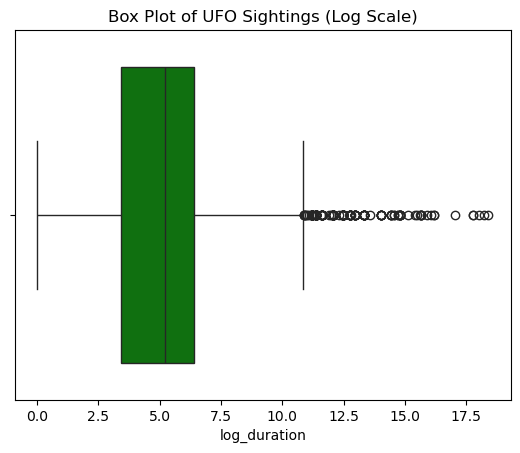

In [28]:
ufo['log_duration'] = np.log1p(ufo['duration (seconds)']) #Running our duration in seconds data through the log function and creating a new column of log of the duration in UFO
sns.boxplot(x='log_duration', data=ufo, color='green') #Creating a boxplot to view the total distribution of the duration of these sighting events
plt.title("Box Plot of UFO Sightings (Log Scale)")
plt.show()

Text(0.5, 1.0, 'Kernel Density Plot of Duration by Country (Log Scale)')

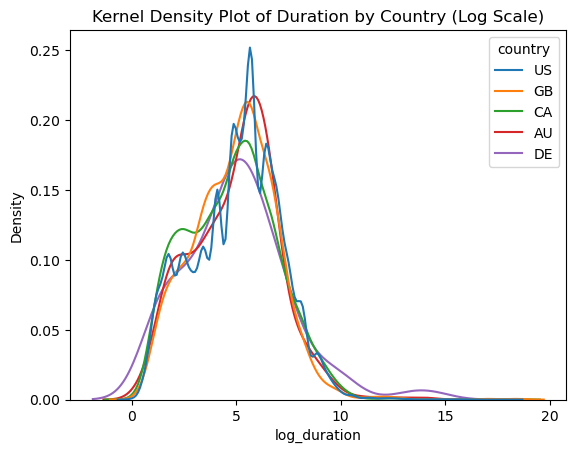

In [31]:
sns.kdeplot(data=ufo, x='log_duration', hue='country',common_norm=False)#Kernel density plot examining the log of the duration by country, normalized
plt.title('Kernel Density Plot of Duration by Country (Log Scale)')

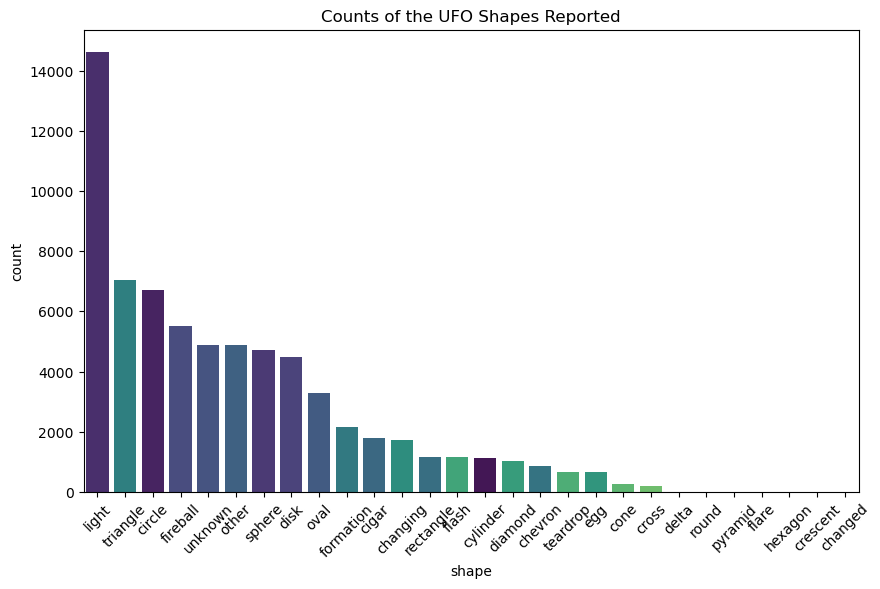

In [34]:
plt.figure(figsize=(10,6)) #Adjusting figure size
sns.countplot(data=ufo, x='shape', hue='shape', order=ufo['shape'].value_counts().index, palette="viridis", legend=False) #Creating a countplot to understand the reported shapes of the UFO and frquencies of the reports across shape categories
plt.xticks(rotation=45) #Rotating the writing so it doesn't clash and become illegible
plt.title('Counts of the UFO Shapes Reported')
plt.show()

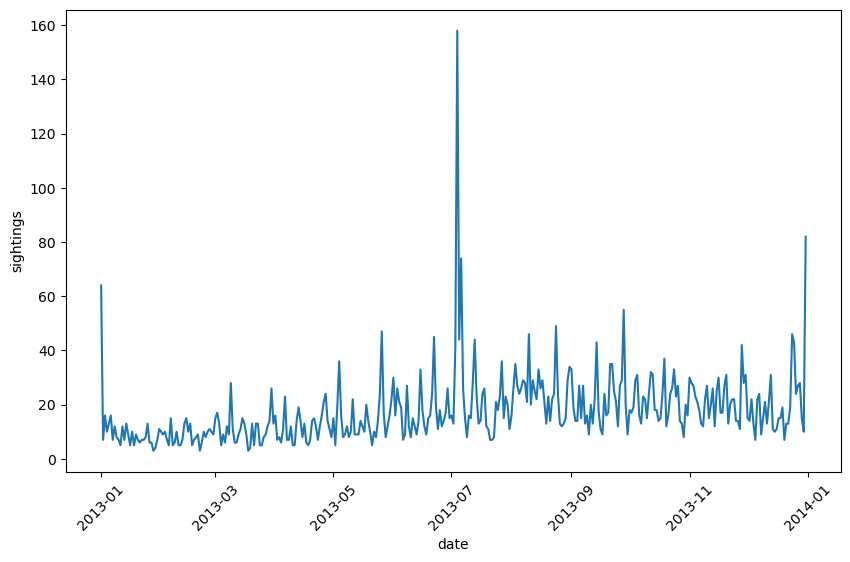

In [37]:
#Timeseries of number of UFO sightings in 2014
ufo['date'] = ufo['datetime'].dt.date #Extracting the date portion of datetime
ufo_counts= ufo.groupby('date').size().reset_index(name='sightings') #Grouping by date and findings the number of sightings
ufo_counts['date'] = pd.to_datetime(ufo_counts['date']) #Recasting to datetime 
ufo_counts_2013 = ufo_counts[ufo_counts['date'].dt.year == 2013] #Selecting the UFO sightings reported in 2013
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=ufo_counts_2013, x='date', y='sightings') #Graphing the plot on number of sightings
plt.xticks(rotation=45)
plt.show()

In [41]:
top_number = ufo['date'].value_counts().head(15) #dates where most sightings were recorded
print(top_number)

date
2010-07-04    186
2012-07-04    167
1999-11-16    165
2013-07-04    158
2011-07-04    132
2009-09-19    112
2014-01-01     90
2013-12-31     82
2004-10-31     81
2009-07-04     79
2013-07-06     74
1997-03-13     65
2013-01-01     64
2012-01-01     63
2012-12-31     61
Name: count, dtype: int64


In [57]:
top_number = ufo['year'].value_counts().head(15) #years where most sightings were recorded
print(top_number)

year
2012    6668
2013    6391
2011    4573
2008    4307
2009    4034
2010    3820
2007    3791
2004    3667
2005    3578
2003    3439
2006    3231
2002    2785
2001    2737
1999    2403
2000    2389
Name: count, dtype: int64


Text(0, 0.5, 'Duration (seconds)')

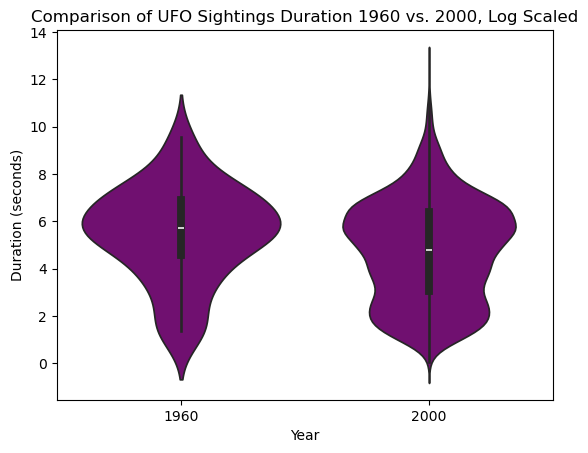

In [49]:
#Creating a violine plot for the duration of the UFO sightings in 1960 compared to 2000
ufo['year'] = ufo['datetime'].dt.year #Extracting year portion of datetime
filt_year = ufo[ufo['year'].isin([1960, 2000])] #Filtering dateframe to find only observations in 1960 and 2000
filt_year.loc[:, 'log_duration'] = np.log1p(filt_year['duration (seconds)']) #Running the duration through the log function 
sns.violinplot(x='year', y='log_duration', data=filt_year, color='purple') #Graphing the violin plot
plt.title('Comparison of UFO Sightings Duration 1960 vs. 2000, Log Scaled') 
plt.xlabel('Year')
plt.ylabel('Duration (seconds)')

In [51]:
ufo.head() #checking date and year columns added

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude,log_duration,date,year
0,1949-10-10 20:30:00,san marcos,tx,US,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,7.901377,1949-10-10,1949
2,1955-10-10 17:00:00,chester (uk/england),NaN,GB,circle,20.0,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,3.044522,1955-10-10,1955
3,1956-10-10 21:00:00,edna,tx,US,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,3.044522,1956-10-10,1956
4,1960-10-10 20:00:00,kaneohe,hi,US,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,6.803505,1960-10-10,1960
5,1961-10-10 19:00:00,bristol,tn,US,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889,5.707110,1961-10-10,1961


In [129]:
pd.crosstab(ufo['country'],ufo['shape'], normalize='index') #Cross tabulating the country of observation with shape observed, values normalized on rows in order to account for varying numbers of sightings

shape,changed,changing,chevron,cigar,circle,cone,crescent,cross,cylinder,delta,...,light,other,oval,pyramid,rectangle,round,sphere,teardrop,triangle,unknown
country,,,,,,,,,,,,,,,,,,,,,
AU,0.000000,0.017078,0.005693,0.028463,0.117647,0.011385,0.000000,0.001898,0.017078,0.000000,...,0.225806,0.075901,0.056926,0.000000,0.018975,0.000000,0.028463,0.018975,0.081594,0.047438
CA,0.000000,0.023350,0.012183,0.025042,0.096108,0.003384,0.000000,0.003046,0.017936,0.000338,...,0.221658,0.081557,0.043993,0.000000,0.015905,0.000000,0.069374,0.007445,0.090694,0.070051
DE,0.000000,0.019417,0.009709,0.029126,0.097087,0.000000,0.000000,0.000000,0.029126,0.000000,...,0.194175,0.087379,0.067961,0.000000,0.009709,0.000000,0.067961,0.000000,0.087379,0.077670
GB,0.000000,0.024798,0.004313,0.032345,0.130997,0.007008,0.000000,0.005391,0.016173,0.000000,...,0.194609,0.071698,0.046361,0.000000,0.015633,0.000000,0.085175,0.020485,0.091105,0.049596
US,0.000016,0.024921,0.012822,0.025849,0.096254,0.003886,0.000016,0.002958,0.016158,0.000094,...,0.211970,0.070263,0.047702,0.000016,0.016834,0.000031,0.068391,0.009314,0.103035,0.071852


In [43]:
top_number = ufo['state'].value_counts().head(10) #states where most sightings were recorded
print(top_number)

state
ca    8912
wa    3968
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2276
mi    1836
Name: count, dtype: int64


In [53]:
pd.crosstab(ufo['country'],ufo['year'], normalize='index') #sightings by country and year

year,1910,1920,1925,1929,1931,1934,1936,1937,1939,1941,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
AU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.089219,0.068773,0.050186,0.031599,0.026022,0.029740,0.024164,0.035316,0.059480,0.026022
CA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000333,0.000000,0.000000,0.000000,...,0.061000,0.047667,0.053333,0.039667,0.044667,0.045667,0.042333,0.080667,0.082667,0.015000
DE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028571,0.038095,0.085714,0.142857,0.057143,0.038095,0.028571,0.057143,0.057143,0.028571
GB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060892,0.085564,0.065617,0.073491,0.106037,0.060367,0.026772,0.043045,0.025197,0.011024
US,0.000031,0.000015,0.000015,0.000015,0.000031,0.000015,0.000015,0.000031,0.000046,0.000015,...,0.049575,0.044292,0.053291,0.061676,0.056486,0.054489,0.067251,0.097045,0.093021,0.030162


### Our Data ###
This data is a compilation of 80,000 global UFO sightings. It includes key variables such as datetime, shape, and location that we can examine to discover potential patterns. Typically, we wouldn't consider something like UFO sightings to have a common thread, but through EDA and targeted investigation, we may be able to uncover some unforseen correlations. We are specifically interested in how UFO sightings vary across locations and time. Are there certain times or dates when it is more common to "spot" a UFO? Are there certain locations? We want to determine if there is commonality to these claims. Perhaps we can find consistency that proves these sightings to be more than flukes! Unfortunately, here we are faced with only a few categories that characterize each event. As a result, we expected to face some deadends when it comes to analysis. Not everything will yield a pattern, but we are hoping that if we are smart with the regressions and classifications we choose to conduct, we will come to some sort of conclusions regarding the commonalities behind UFO sightings. Perhaps, certain countries experience longer UFO events or report a certain shape more often. From there, we also have the potential to draw on other databases for comparison. For example, a database of popular dates for fireworks show may relate to dates when a lot of UFOs are spotted. That comparison may build on our potential for more patterns and correlations. 